<a href="https://colab.research.google.com/github/RawanKhaled20/growintern_Task1/blob/main/Car_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rawankhaled20","key":"f5a17aecb67ca4675b425dadbe4ab60e"}'}

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets list

ref                                                        title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023               47KB  2023-08-26 11:04:57          23442        713  1.0              
iamsouravbanerjee/customer-shopping-trends-dataset         Customer Shopping Trends Dataset              146KB  2023-10-05 06:45:37            939         34  1.0              
willianoliveiragibin/diabetesdataanslysis                  diabetesDataAnslysis                            9KB  2023-09-27 19:54:22            818         24  1.0              
joebeachcapital/students-performance                       Students Performance                            2KB  202

In [41]:
!kaggle datasets download -d ahmettalhabektas/argentina-car-prices

  0% 0.00/7.64k [00:00<?, ?B/s]
100% 7.64k/7.64k [00:00<00:00, 17.9MB/s]


In [42]:
! unzip argentina-car-prices.zip

Archive:  argentina-car-prices.zip
  inflating: argentina_cars.csv      


In [8]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [43]:
dataset=pd.read_csv('argentina_cars.csv')

In [44]:
dataset.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [45]:
# Count total NaN values in the entire DataFrame
total_nan_count = dataset.isna().sum().sum()
print("\nTotal NaN values in the DataFrame:", total_nan_count)


Total NaN values in the DataFrame: 24


In [46]:
dataset=dataset.dropna()

In [47]:
# Count total NaN values in the entire DataFrame
total_nan_count = dataset.isna().sum().sum()
print("\nTotal NaN values in the DataFrame:", total_nan_count)


Total NaN values in the DataFrame: 0


In [48]:
dataset.columns

Index(['money', 'brand', 'model', 'year', 'color', 'fuel_type', 'door', 'gear',
       'motor', 'body_type', 'kilometres', 'currency'],
      dtype='object')

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 1 to 509
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   money       487 non-null    int64  
 1   brand       487 non-null    object 
 2   model       487 non-null    object 
 3   year        487 non-null    int64  
 4   color       487 non-null    object 
 5   fuel_type   487 non-null    object 
 6   door        487 non-null    float64
 7   gear        487 non-null    object 
 8   motor       487 non-null    object 
 9   body_type   487 non-null    object 
 10  kilometres  487 non-null    int64  
 11  currency    487 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 49.5+ KB


In [50]:
data_new=pd.get_dummies(dataset, columns=[ 'brand', 'model','color', 'fuel_type', 'gear', 'motor', 'body_type', 'currency'])

In [51]:
data_new

,money,year,door,kilometres,brand_Audi,brand_BMW,brand_Baic,brand_Chery,brand_Chevrolet,brand_Citroën,...,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,currency_dólares,currency_pesos
1,10850000,2022,5.0,500,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,35500,2022,5.0,500,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,5800000,2019,4.0,9000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,34500,2022,5.0,10500,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6,25000,2014,5.0,156000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,5250000,2018,5.0,52000,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
506,46000,2019,4.0,49000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
507,3960000,2017,5.0,75358,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
508,44900,2019,4.0,57500,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [52]:
data_new.shape

(487, 237)

In [53]:
x=data_new.drop("money", axis=1)
y=data_new["money"]

In [54]:
y

1      10850000
2         35500
4       5800000
5         34500
6         25000
         ...   
505     5250000
506       46000
507     3960000
508       44900
509     2890000
Name: money, Length: 487, dtype: int64

In [55]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [56]:
#linear regression

model=LinearRegression()

model.fit(x_train, y_train)

score=model.score(x_test, y_test)

In [57]:
print(score)

0.6776340255864797


In [58]:
prediction=model.predict(x_test)
print(prediction)

[ 5904390.35992533  4584739.86169869  2154417.94135833  1240318.33544511
  3786705.50847518  3348332.19567221  3592911.16151232  5034290.77868682
  4096507.00173068  8085617.2853846   -628682.57563287  2611243.59691358
  5632767.13505936  -661314.91031468 -3426115.79415894  4574669.67965758
  6946432.43364465  2918016.69684172   243453.86682922  3010464.36506933
  3262761.99551177  4977322.33292317  7071155.90510815  8092782.72709572
  3179307.65563464  7842696.5134055   2802171.52988917  5550566.95348024
  9989440.55341661  3600584.60281521  4438563.19659877   971985.3167538
  3509806.98790967  4199609.24458981  -309634.31308407  8737907.02911335
  2236926.07032478  5158064.69119781  6605479.98316562  7346538.77846247
  5495932.87070197  6263955.34679347  3027750.40787083  3161166.454431
  5827814.31882465  8652348.20135343  3882652.47629005  3262434.4901973
 -3351577.43741113  3325285.75828254 12737073.91824853  5971372.49302036
  3013602.93635243  -346095.15431726  3759224.42983234 

In [59]:
y_test

82     4250000
258    3789900
459    2400000
89     2100500
423    3600000
        ...   
233    4400000
240    3600000
343    2600000
419    3189900
420    8300000
Name: money, Length: 98, dtype: int64

In [60]:
mse=mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
print('the mean square value is: ', mse)
print('the root mean square value is: ', rmse)

the mean square value is:  2577021479925.6045
the root mean square value is:  1605310.3998683882


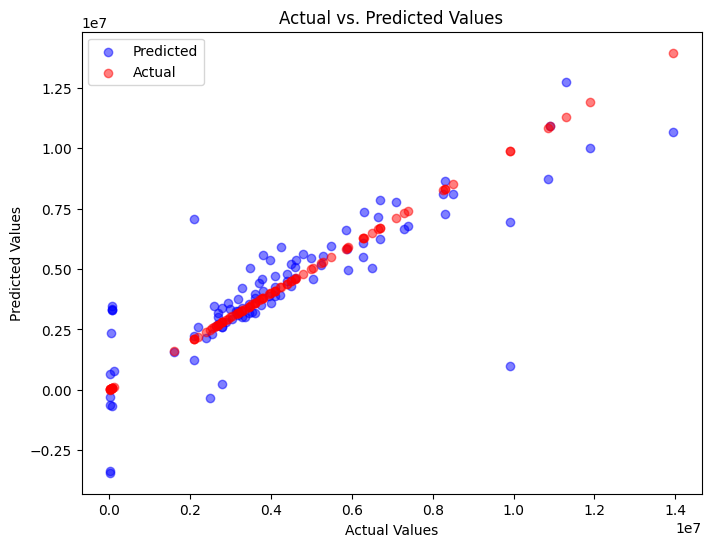

In [61]:
#plot the relation between the actual test values and the predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction , c='blue', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='red', label='Actual', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

In [62]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

In [64]:
accuracy = model.score(x_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


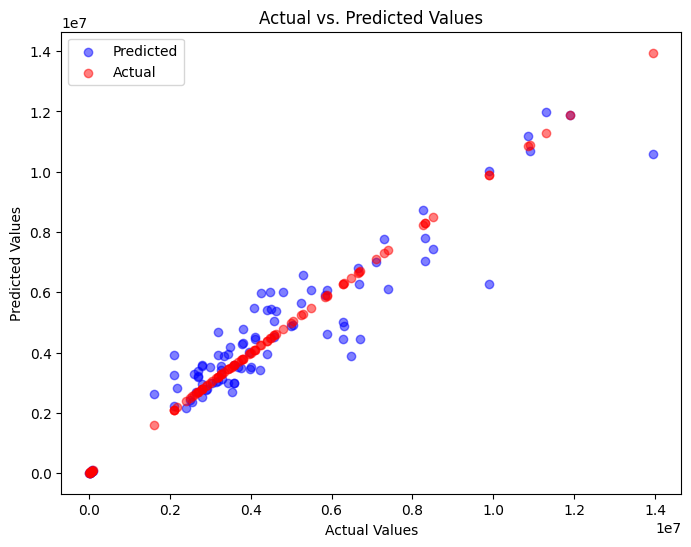

In [66]:
#plot the relation between the actual test values and the predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred , c='blue', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='red', label='Actual', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

In [67]:
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('the mean square value is: ', mse)
print('the root mean square value is: ', rmse)

the mean square value is:  842607977860.6628
the root mean square value is:  917936.8049384787
